In [88]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
import anndata as ad
import matplotlib.pyplot as plt
import moscot as mt
import mplscience
import numpy as np
import pandas
import scanpy as sc
import squidpy as sq

mplscience.set_style()
plt.rcParams["legend.scatterpoints"] = 1

In [80]:
adata1 = ad.read_h5ad(
    "/Users/giovanni.palla/Datasets/moscot/E14-16h_a_count_normal_stereoseq.h5ad"
)
adata2 = ad.read_h5ad(
    "/Users/giovanni.palla/Datasets/moscot/E16-18h_a_count_normal_stereoseq.h5ad"
)
print(adata1.X.sum(), adata2.X.sum())
print(adata1.layers["raw_counts"].sum(), adata2.layers["raw_counts"].sum())
# ['0', '1', '2', '3', '4', '5', '6', '7']
# adata = adata[adata.obs.synth_batch == str(dataset["batch"])].copy()
# adata.X = rng.normal(size=adata.X.shape) + adata.X.copy()

11205762.0 7028254.5
35190190.0 22735988.0


In [79]:
adata1.layers

Layers with keys: raw_counts

/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


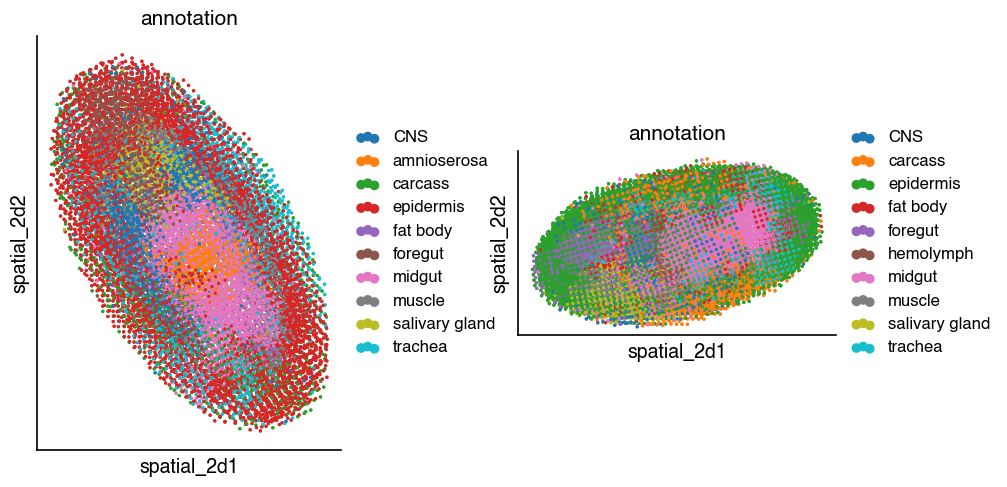

In [91]:
adata1.obsm["spatial_2d"] = adata1.obsm["spatial"][:, [0, 1]]
adata2.obsm["spatial_2d"] = adata2.obsm["spatial"][:, [0, 1]]
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sq.pl.spatial_scatter(
    adata1, color="annotation", spatial_key="spatial_2d", shape=None, ax=ax[0]
)
sq.pl.spatial_scatter(
    adata2, color="annotation", spatial_key="spatial_2d", shape=None, ax=ax[1]
)
plt.tight_layout()

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:324: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


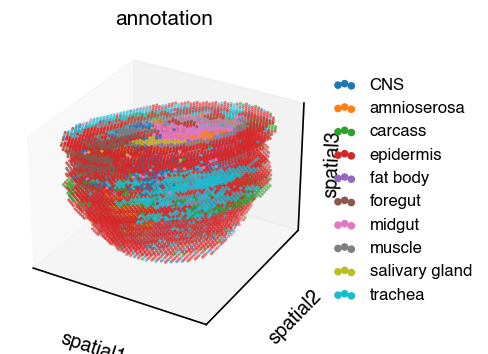

/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:324: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = ax.scatter(


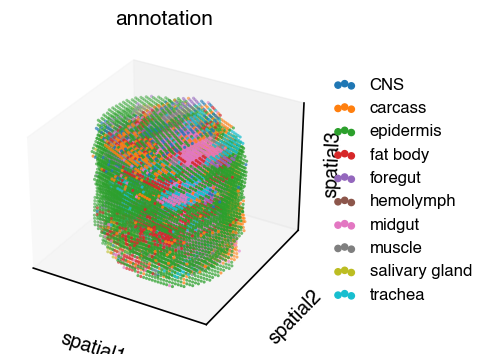

<Figure size 400x400 with 0 Axes>

In [94]:
sc.pl.embedding(
    adata1,
    basis="spatial",
    projection="3d",
    color="annotation",
)
sc.pl.embedding(
    adata2,
    basis="spatial",
    projection="3d",
    color="annotation",
)
plt.tight_layout()

In [96]:
adata = ad.concat([adata1, adata2], label="time", keys=[14, 16])
ap = mt.problems.spatiotemporal.SpatioTemporalProblem(adata)
ap = ap.prepare(time_key="time", spatial_key="spatial")

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   


In [97]:
ap = ap.solve(cost="cosine", alpha=0.3, epsilon=1e-2, max_iterations=100)

INFO     Solving `1` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='prepared', shape=(15295, 14634)].                                


In [62]:
keys = list(ap.problems.keys())
keys[0]

('E14-16h_a_S02', 'E14-16h_a_S03')

In [68]:
for source, target in keys:
    ap.compute_entropy(
        source=source, target=target, key_added=f"{source}_{target}_entropy"
    )

/Users/giovanni.palla/Projects/moscot/src/moscot/base/problems/_utils.py:725: RuntimeWarning: divide by zero encountered in log
  return -np.sum(p_xy * np.log(p_xy / p_xy.sum(axis=0)), axis=0)
/Users/giovanni.palla/Projects/moscot/src/moscot/base/problems/_utils.py:725: RuntimeWarning: divide by zero encountered in log
  return -np.sum(p_xy * np.log(p_xy / p_xy.sum(axis=0)), axis=0)
/Users/giovanni.palla/Projects/moscot/src/moscot/base/problems/_utils.py:725: RuntimeWarning: divide by zero encountered in log
  return -np.sum(p_xy * np.log(p_xy / p_xy.sum(axis=0)), axis=0)
/Users/giovanni.palla/Projects/moscot/src/moscot/base/problems/_utils.py:725: RuntimeWarning: divide by zero encountered in log
  return -np.sum(p_xy * np.log(p_xy / p_xy.sum(axis=0)), axis=0)
/Users/giovanni.palla/Projects/moscot/src/moscot/base/problems/_utils.py:725: RuntimeWarning: divide by zero encountered in log
  return -np.sum(p_xy * np.log(p_xy / p_xy.sum(axis=0)), axis=0)
/Users/giovanni.palla/Projects/mosc

In [65]:
for source, target in keys:
    ap.cell_transition(
        source=source,
        target=target,
        source_groups="annotation",
        target_groups="annotation",
        key_added=f"{source}_{target}_cell_transition",
    )

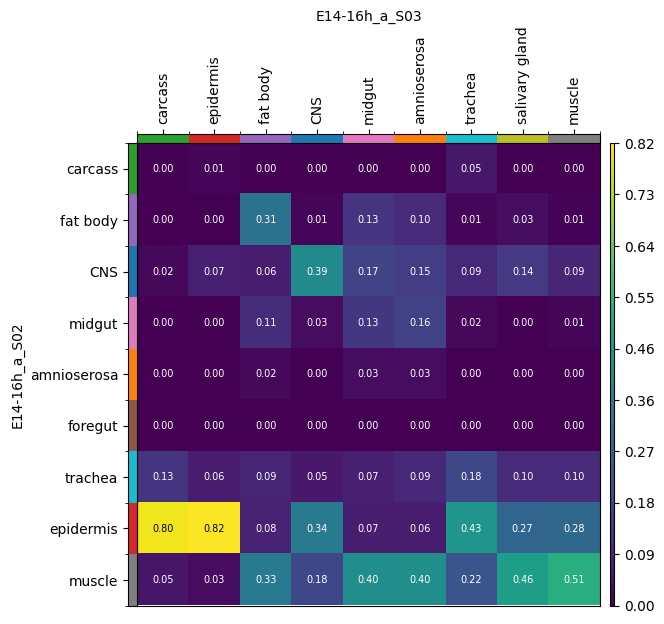

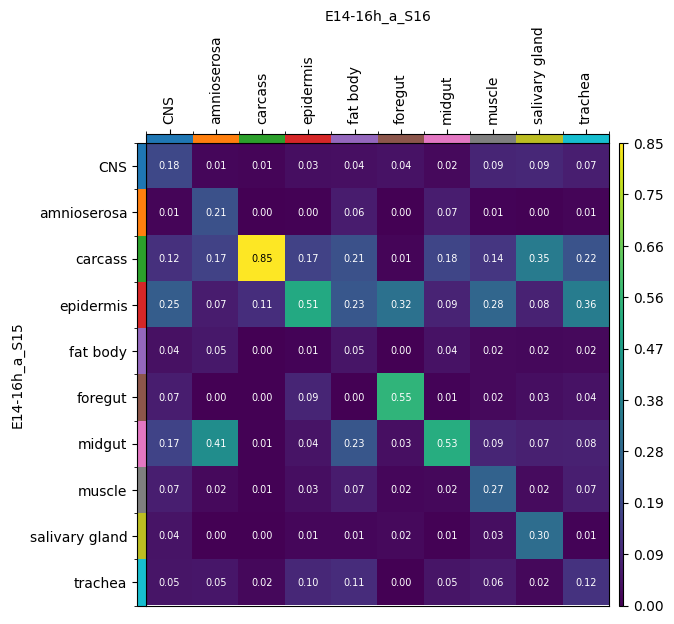

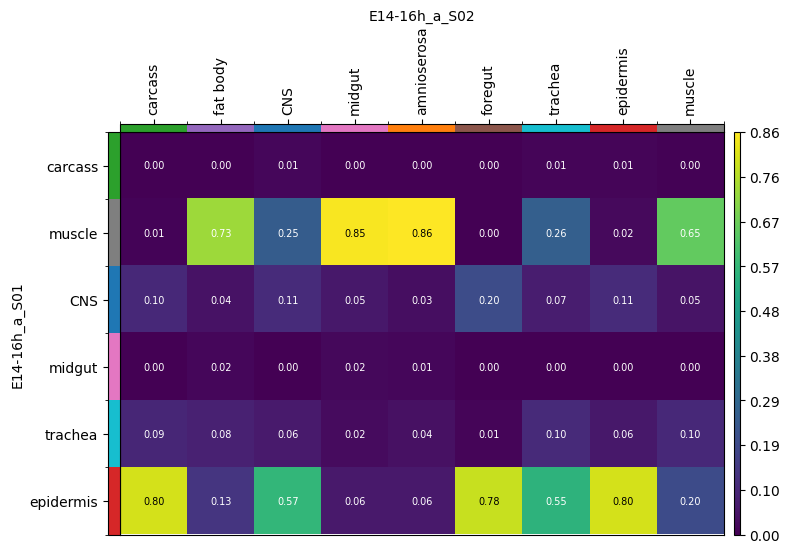

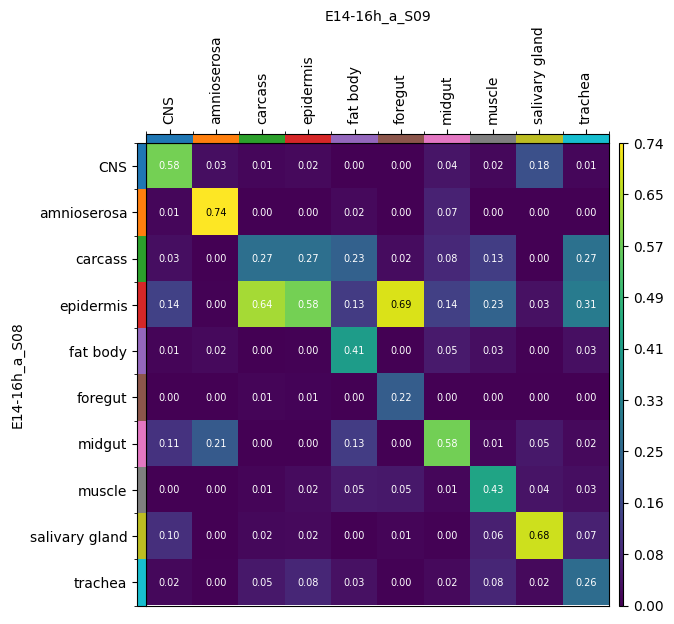

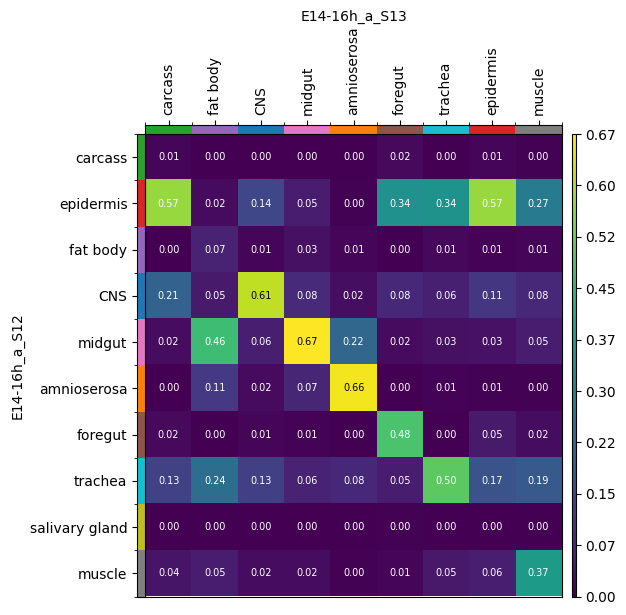

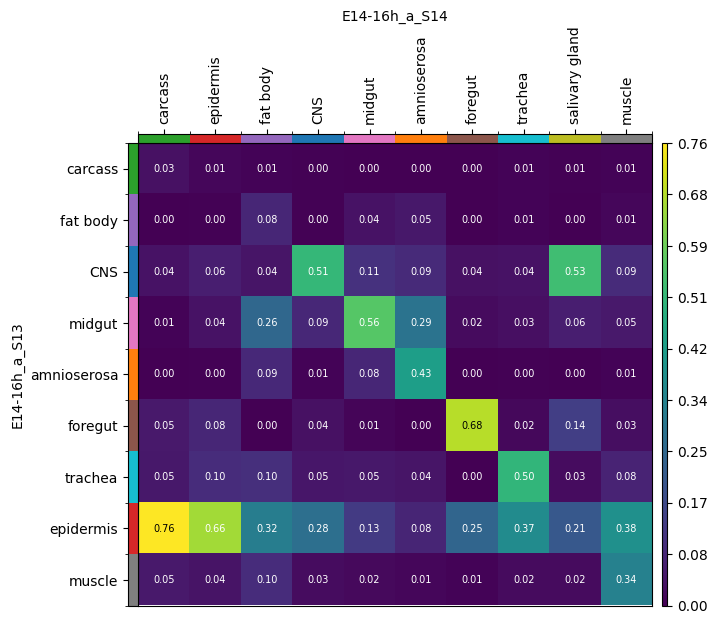

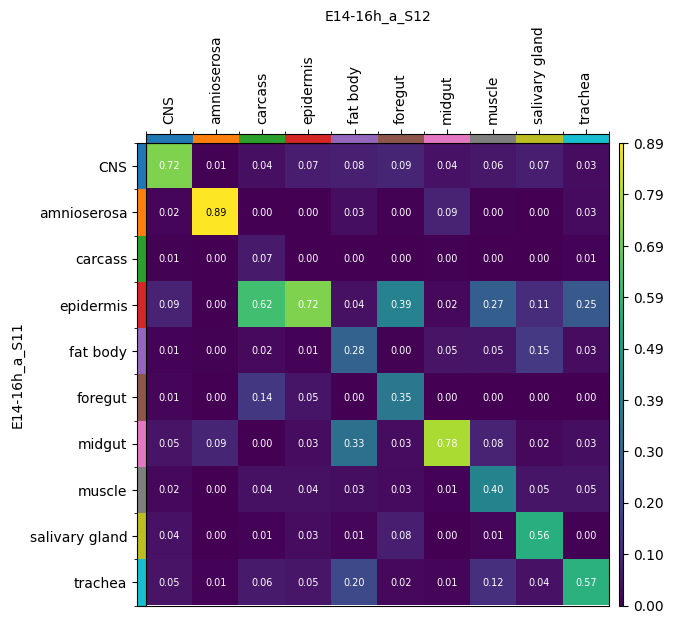

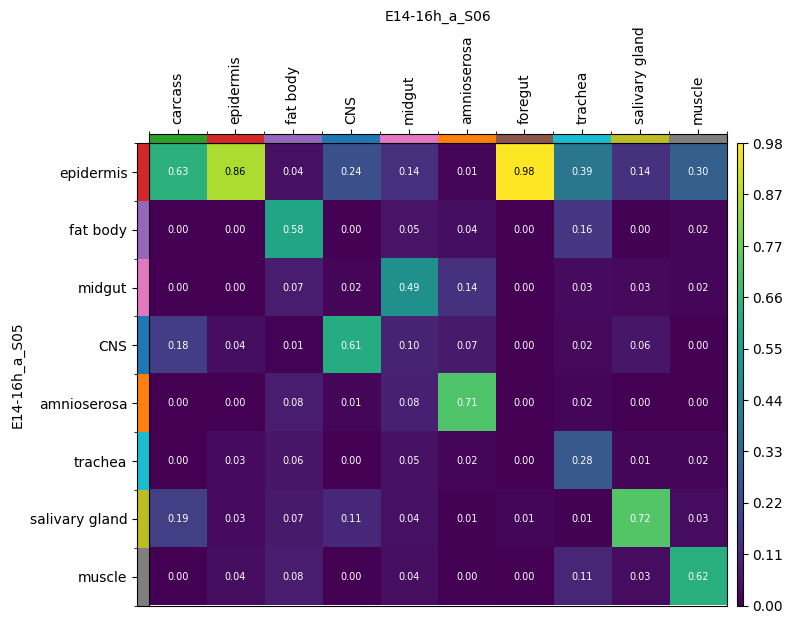

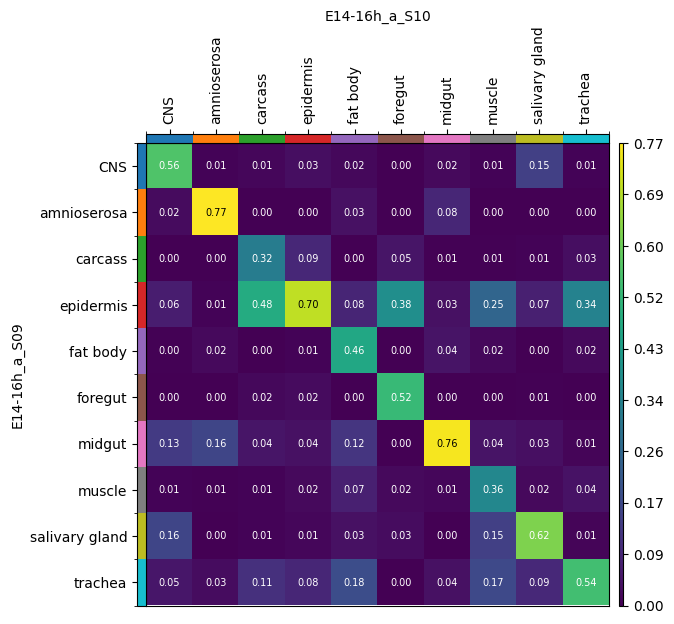

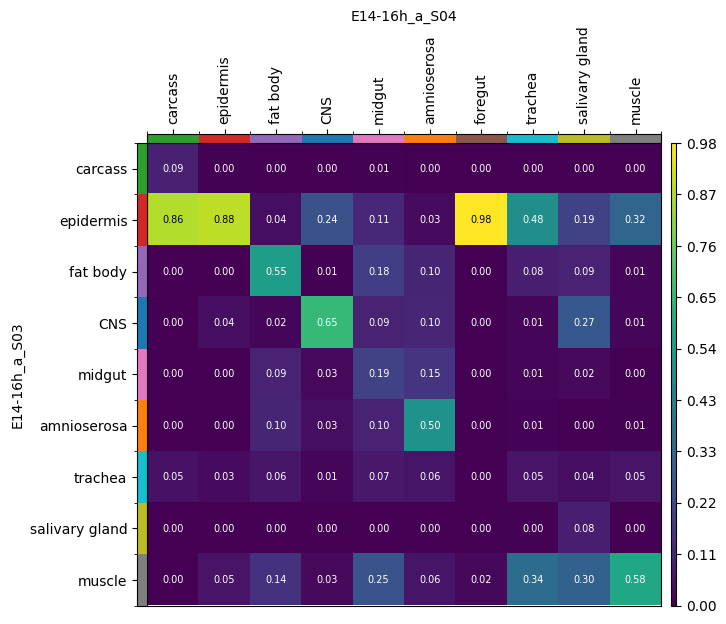

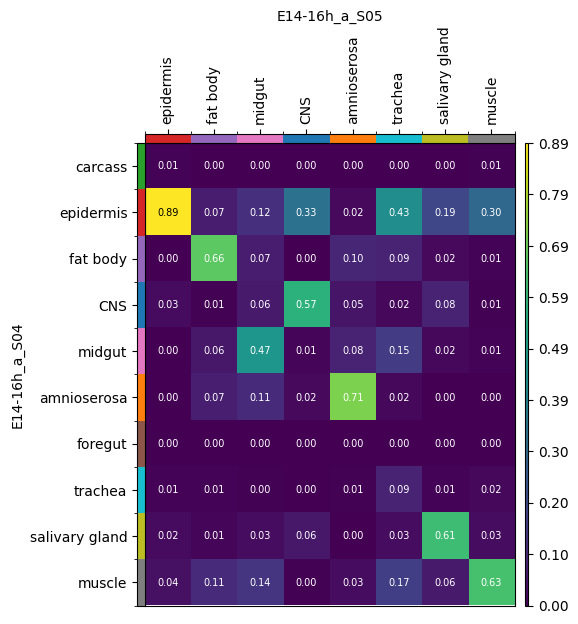

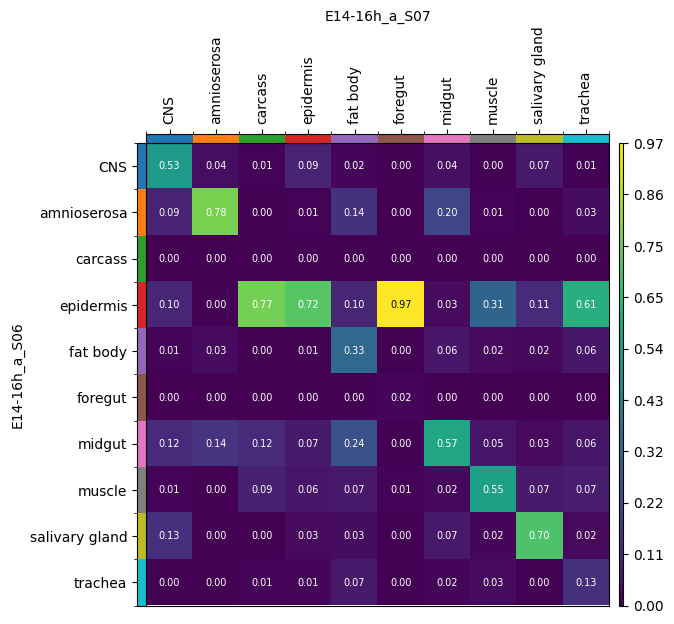

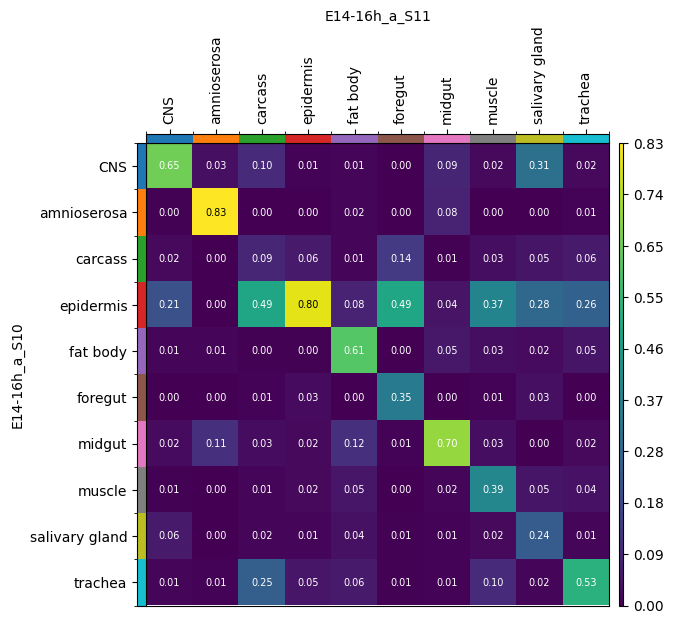

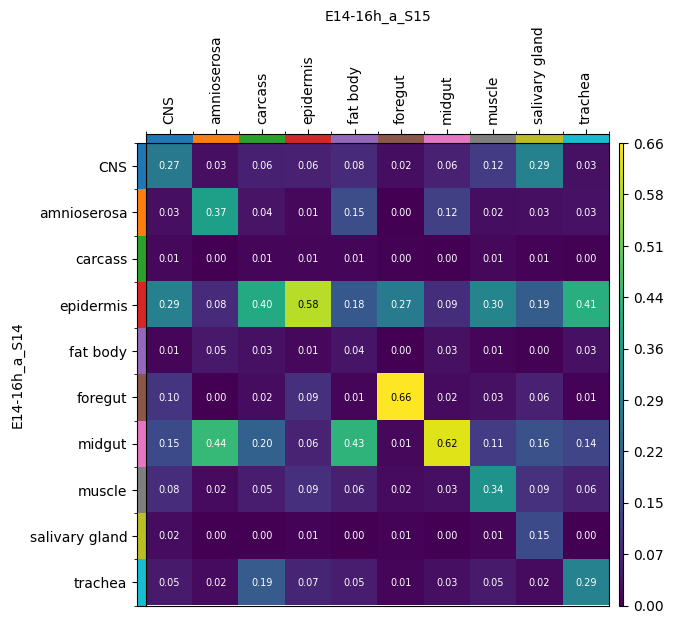

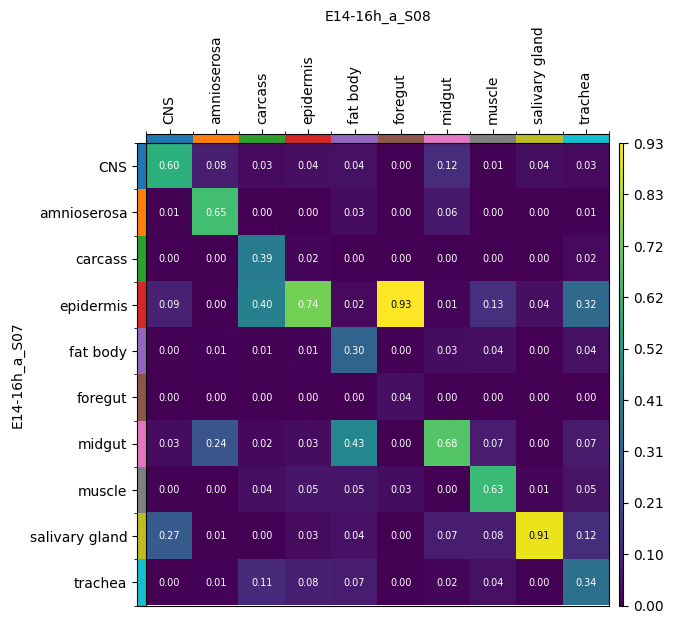

In [67]:
for source, target in keys:
    mt.plotting.cell_transition(
        ap,
        key=f"{source}_{target}_cell_transition",
    )

In [75]:
adata.obs

,slice_ID,raw_x,raw_y,new_x,new_y,new_z,annotation,conditional_entropy,E14-16h_a_S02_E14-16h_a_S03_entropy,E14-16h_a_S15_E14-16h_a_S16_entropy,...,E14-16h_a_S13_E14-16h_a_S14_entropy,E14-16h_a_S11_E14-16h_a_S12_entropy,E14-16h_a_S05_E14-16h_a_S06_entropy,E14-16h_a_S09_E14-16h_a_S10_entropy,E14-16h_a_S03_E14-16h_a_S04_entropy,E14-16h_a_S04_E14-16h_a_S05_entropy,E14-16h_a_S06_E14-16h_a_S07_entropy,E14-16h_a_S10_E14-16h_a_S11_entropy,E14-16h_a_S14_E14-16h_a_S15_entropy,E14-16h_a_S07_E14-16h_a_S08_entropy
E14-16h_a_S01_20500x62780-0,E14-16h_a_S01,20500,62780,-11.170124,-8.070539,1.0,CNS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14-16h_a_S01_20500x62800-0,E14-16h_a_S01,20500,62800,-11.170124,-7.070539,1.0,CNS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14-16h_a_S01_20500x62820-0,E14-16h_a_S01,20500,62820,-11.170124,-6.070539,1.0,epidermis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14-16h_a_S01_20500x62840-0,E14-16h_a_S01,20500,62840,-11.170124,-5.070539,1.0,CNS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14-16h_a_S01_20500x62860-0,E14-16h_a_S01,20500,62860,-11.170124,-4.070539,1.0,CNS,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E14-16h_a_S16_61760x79320-15,E14-16h_a_S16,-61760,79320,12.958711,-1.527638,16.0,epidermis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14-16h_a_S16_61760x79340-15,E14-16h_a_S16,-61760,79340,13.409526,-0.635020,16.0,epidermis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14-16h_a_S16_61760x79360-15,E14-16h_a_S16,-61760,79360,13.860340,0.257598,16.0,epidermis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E14-16h_a_S16_61760x79380-15,E14-16h_a_S16,-61760,79380,14.311155,1.150216,16.0,epidermis,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
metrics = []
for i in ["0", "1", "2", "3", "4", "5", "6", "7"]:
    rng = np.random.default_rng(int(i))
    adata_sim = adata[adata.obs.synth_batch == str(1)].copy()
    adata_sim.X = rng.normal(size=adata_sim.X.shape) + adata.X.copy()
    p = 0.9
    idx_subsample = rng.choice([True, False], size=(adata_sim.shape[0]), p=[p, 1 - p])
    adata_sim = adata_sim[idx_subsample].copy()
    adata_sim.obs["batch"] = adata_sim.obs["batch"].astype(str)
    adata_sim.obsm["spatial"][450:] = adata_sim.obsm["spatial"][450:] + 2
    adata_source = adata_sim[adata_sim.obs.batch == "0"].copy()
    adata_target = adata_sim[adata_sim.obs.batch == "1"].copy()
    adata_source.obsm["spatial_tgt"] = adata_source.obsm["spatial"]
    adata_target.obsm["spatial_tgt"] = adata_target.obsm["spatial"]

    # create a RigidRegistration object
    reg = DeformableRegistration(
        X=adata_source.obsm["spatial"], Y=adata_target.obsm["spatial"]
    )
    # run the registration & collect the results
    out, _ = reg.register()
    adata_target.obsm["spatial_tgt"] = out

    _, comm1, comm2 = np.intersect1d(
        adata_source.obs.idx, adata_target.obs.idx, return_indices=True
    )
    error_cpd = (
        np.mean(
            adata_target.obsm["spatial_tgt"][comm2, :]
            - adata_source.obsm["spatial_tgt"][comm1, :]
        )
        ** 2
    )
    ap = mt.problems.AlignmentProblem(adata_sim)
    ap = ap.prepare(batch_key="batch")
    ap = ap.solve()
    ap.align(reference="0", key_added="spatial_moscot")
    ad1 = adata_sim[adata_sim.obs.batch == "0"].copy()
    ad2 = adata_sim[adata_sim.obs.batch == "1"].copy()
    _, comm1, comm2 = np.intersect1d(ad1.obs.idx, ad2.obs.idx, return_indices=True)
    error_moscot_default = (
        np.mean(ad1.obsm["spatial_moscot"][comm1] - ad2.obsm["spatial_moscot"][comm2])
        ** 2
    )
    ap = mt.problems.AlignmentProblem(adata_sim)
    ap = ap.prepare(batch_key="batch")
    ap = ap.solve(alpha=0.3)
    ap.align(reference="0", key_added="spatial_moscot")
    ad1 = adata_sim[adata_sim.obs.batch == "0"].copy()
    ad2 = adata_sim[adata_sim.obs.batch == "1"].copy()
    _, comm1, comm2 = np.intersect1d(ad1.obs.idx, ad2.obs.idx, return_indices=True)
    error_moscot_alpha = (
        np.mean(ad1.obsm["spatial_moscot"][comm1] - ad2.obsm["spatial_moscot"][comm2])
        ** 2
    )
    metrics.append(
        {
            "moscot-default": error_moscot_default,
            "d-cpd": error_cpd,
            "moscot-alpha=0.2": error_moscot_alpha,
        }
    )
    if error_moscot_alpha < 1e-6:
        adata_source_ex, adata_target_ex, adata_sim_ex = (
            adata_source,
            adata_target,
            adata_sim,
        )

INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                                                                   
INFO     Solving `1` problems                                                                                      
INFO     Solving problem OTProblem[stage='prepared', shape=(349, 354)].                                            
WARNING  Solver did not converge                                                                                   
INFO     Computing pca with `n_comps=30` for `xy` using `adata.X`                                                  
INFO     Normalizing spatial coordinates of `x`.                                                                   
INFO     Normalizing spatial coordinates of `y`.                        

In [92]:
import pandas as pd

df = pd.DataFrame(metrics).melt()
df.columns = ["method", "mse"]
df

,method,mse
0,moscot-default,7.791542e-04
1,moscot-default,3.548656e-06
2,moscot-default,5.009060e-05
3,moscot-default,5.546657e-05
4,moscot-default,4.623098e-07
5,moscot-default,3.622920e-04
6,moscot-default,1.436595e-04
7,moscot-default,1.100935e-04
8,d-cpd,1.422889e-03
9,d-cpd,1.204339e-04


/var/folders/b2/j8d696xn30qch16zmxwy376c0000gn/T/ipykernel_2457/231221447.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/Users/giovanni.palla/miniconda3/envs/moscot/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


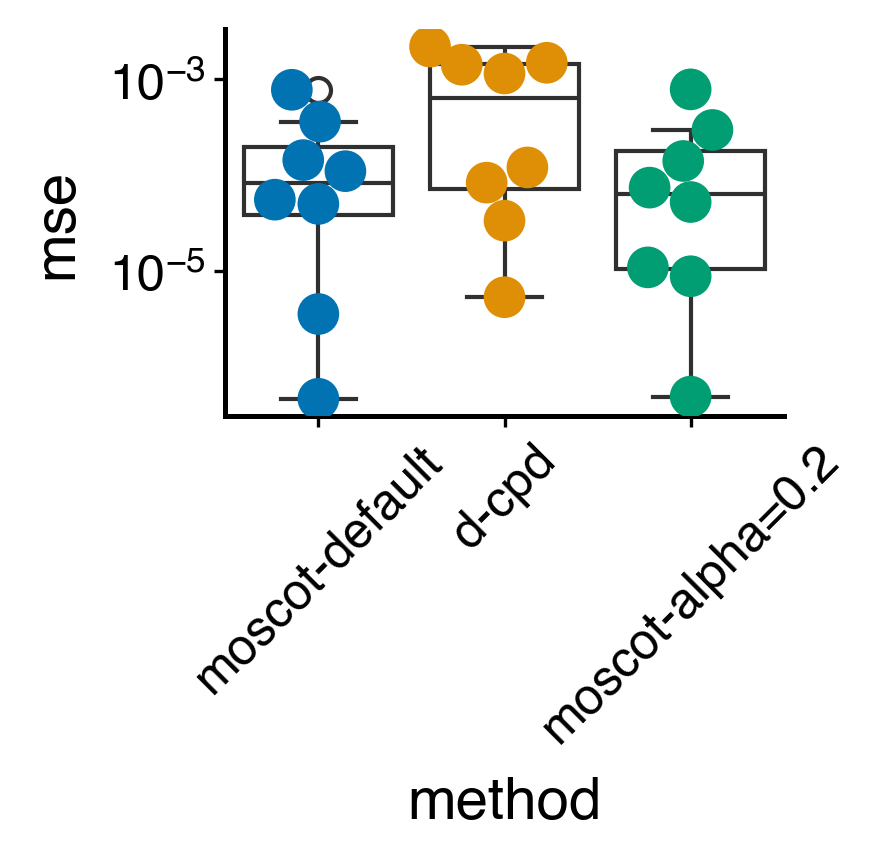

In [99]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

plt.rcParams["legend.scatterpoints"] = 1
mplscience.set_style()
mpl.rcParams["figure.dpi"] = 300
mpl.rcParams["figure.figsize"] = (3, 3)
# palette = "deep"

# sc.set_figure_params(figsize=(3, 3), dpi=100)
# fig, axs = plt.subplots(1, 1, figsize=(4, 3), dpi=200)


def fixed_boxplot(x, y, *args, label=None, **kwargs):
    sns.boxplot(
        x=x,
        y=y,
        # hue=x,
        palette="colorblind",
        boxprops={"facecolor": "None"},
        dodge=False,
        *args,
        **kwargs,
        # labels=[label]
    ).set_yscale("log")
    sns.swarmplot(
        x=x, y=y, hue=x, palette="colorblind", size=10, dodge=False, *args, **kwargs
    ).set_yscale("log")
    plt.xticks(rotation=45)


g = sns.FacetGrid(df)

g.map(fixed_boxplot, "method", "mse")
axes = g.axes.flatten()

/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


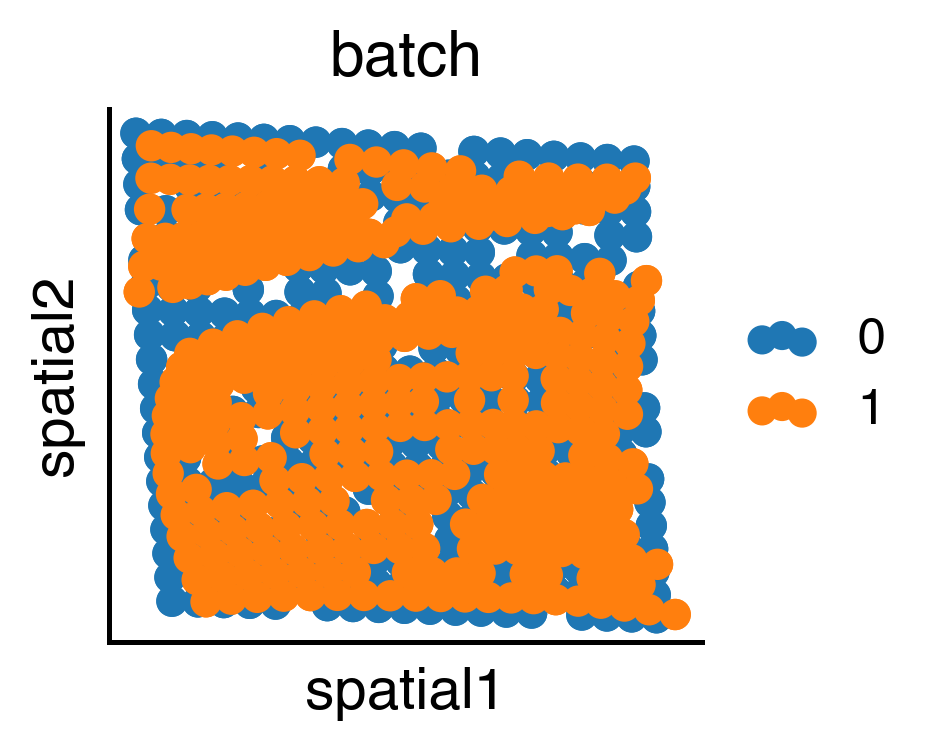

In [94]:
adata_out = ad.concat([adata_source_ex, adata_target_ex])
sq.pl.spatial_scatter(
    adata_out,
    color="batch",
    shape=None,
    spatial_key="spatial_tgt",
    axis_label=["spatial1", "spatial2"],
)

/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


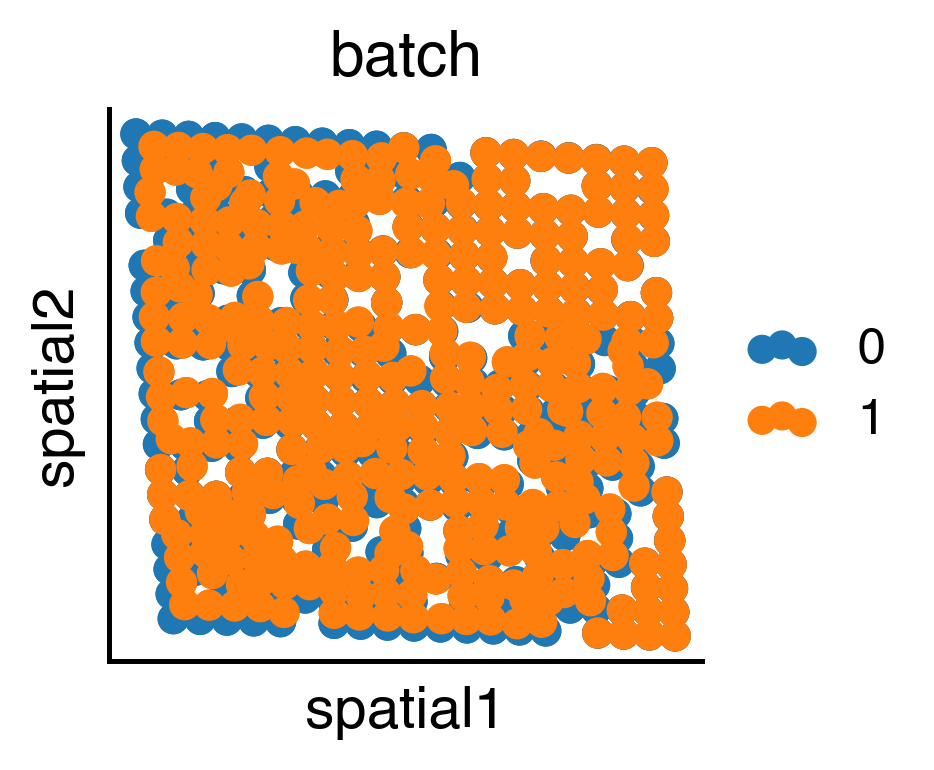

In [95]:
sq.pl.spatial_scatter(
    adata_sim_ex,
    color="batch",
    shape=None,
    spatial_key="spatial_moscot",
    axis_label=["spatial1", "spatial2"],
)

/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/Users/giovanni.palla/Projects/squidpy/src/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


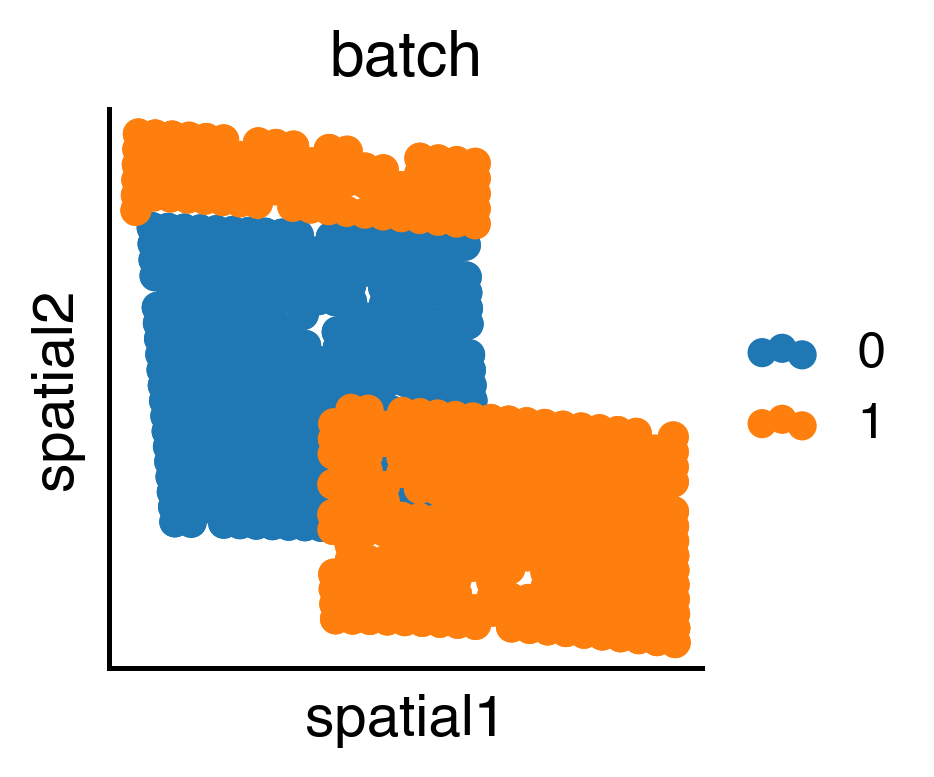

In [96]:
sq.pl.spatial_scatter(
    adata_sim,
    color="batch",
    shape=None,
    spatial_key="spatial",
    axis_label=["spatial1", "spatial2"],
)